In [84]:
from PIL import Image, ImageDraw
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re

In [66]:
def draw_lines_on_image(image, num_lines, orientation, line_width):
    # Create a drawing object
    draw = ImageDraw.Draw(image)

    # Define the dimensions of the image
    width, height = image.size

    # Generate 10 random horizontal or vertical lines on the image
    for i in range(num_lines):        
        if orientation == 0:  # Generate a horizontal line
            y = random.randint(0, height)
            x1, x2 = random.sample(range(0, width), 2)
            color = (0,0,0)
            draw.line([(x1, y), (x2, y)], fill=color, width=line_width)
        elif orientation == 1:  # Generate a vertical line
            x = random.randint(0, width)
            y1, y2 = random.sample(range(0, height), 2)
            color = (0,0,0)
            draw.line([(x, y1), (x, y2)], fill=color, width=line_width)
        else:
            # Generate the coordinates of the endpoints of the line
            x1, y1 = random.randint(0, width), random.randint(0, height)
            x2, y2 = random.randint(0, width), random.randint(0, height)
            color = (0,0,0)
            draw.line([(x1, y1), (x2, y2)], fill=color, width=line_width)

    return image

In [63]:
def image_to_array(image): 
    # Convert the image to black and white
    image = image.convert('L')
    
    # Convert the image to a numpy array
    array = np.array(image)
    
    # Scale the pixel values to be between 0 and 1
    array = array.astype('float32') / 255.
    
    return array

In [64]:
def display_image(image_array):
    # Scale the pixel values back to the 0-255 range
    scaled_image_array = (image_array * 255).astype('uint8')
    
    # Display the image using matplotlib
    plt.imshow(scaled_image_array, cmap='gray')
    plt.show()

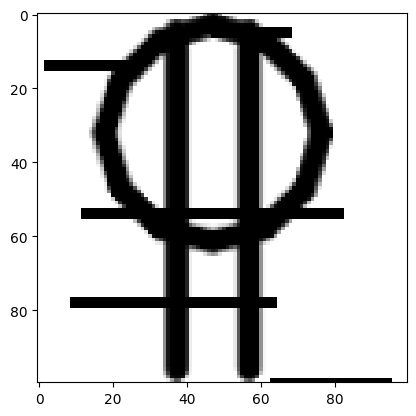

In [82]:
img_path = r'../data/img_format/symbols/receptacle/duplex1bicubicsharp.png'
image = Image.open(img_path)
image = draw_lines_on_image(image, 5, 0, 3)
array = image_to_array(image)
display_image(array)

In [98]:
df = pd.DataFrame(columns=['label','imgarray'])
img_path = r'../data/img_format/symbols/receptacle/duplex1bicubicsharp.png'
for x in range(200):
    image = Image.open(img_path)
    image = draw_lines_on_image(image, 5, random.randint(0,2), random.randint(1,5))
    array = image_to_array(image)
    match = re.search(r'/(\w+)\d+?\w*\.png$', img_path)
    label = match.group(1)
    new_row = pd.DataFrame([[label, array]], columns=['label', 'imgarray'])
    df = pd.concat([df,new_row], ignore_index=True)

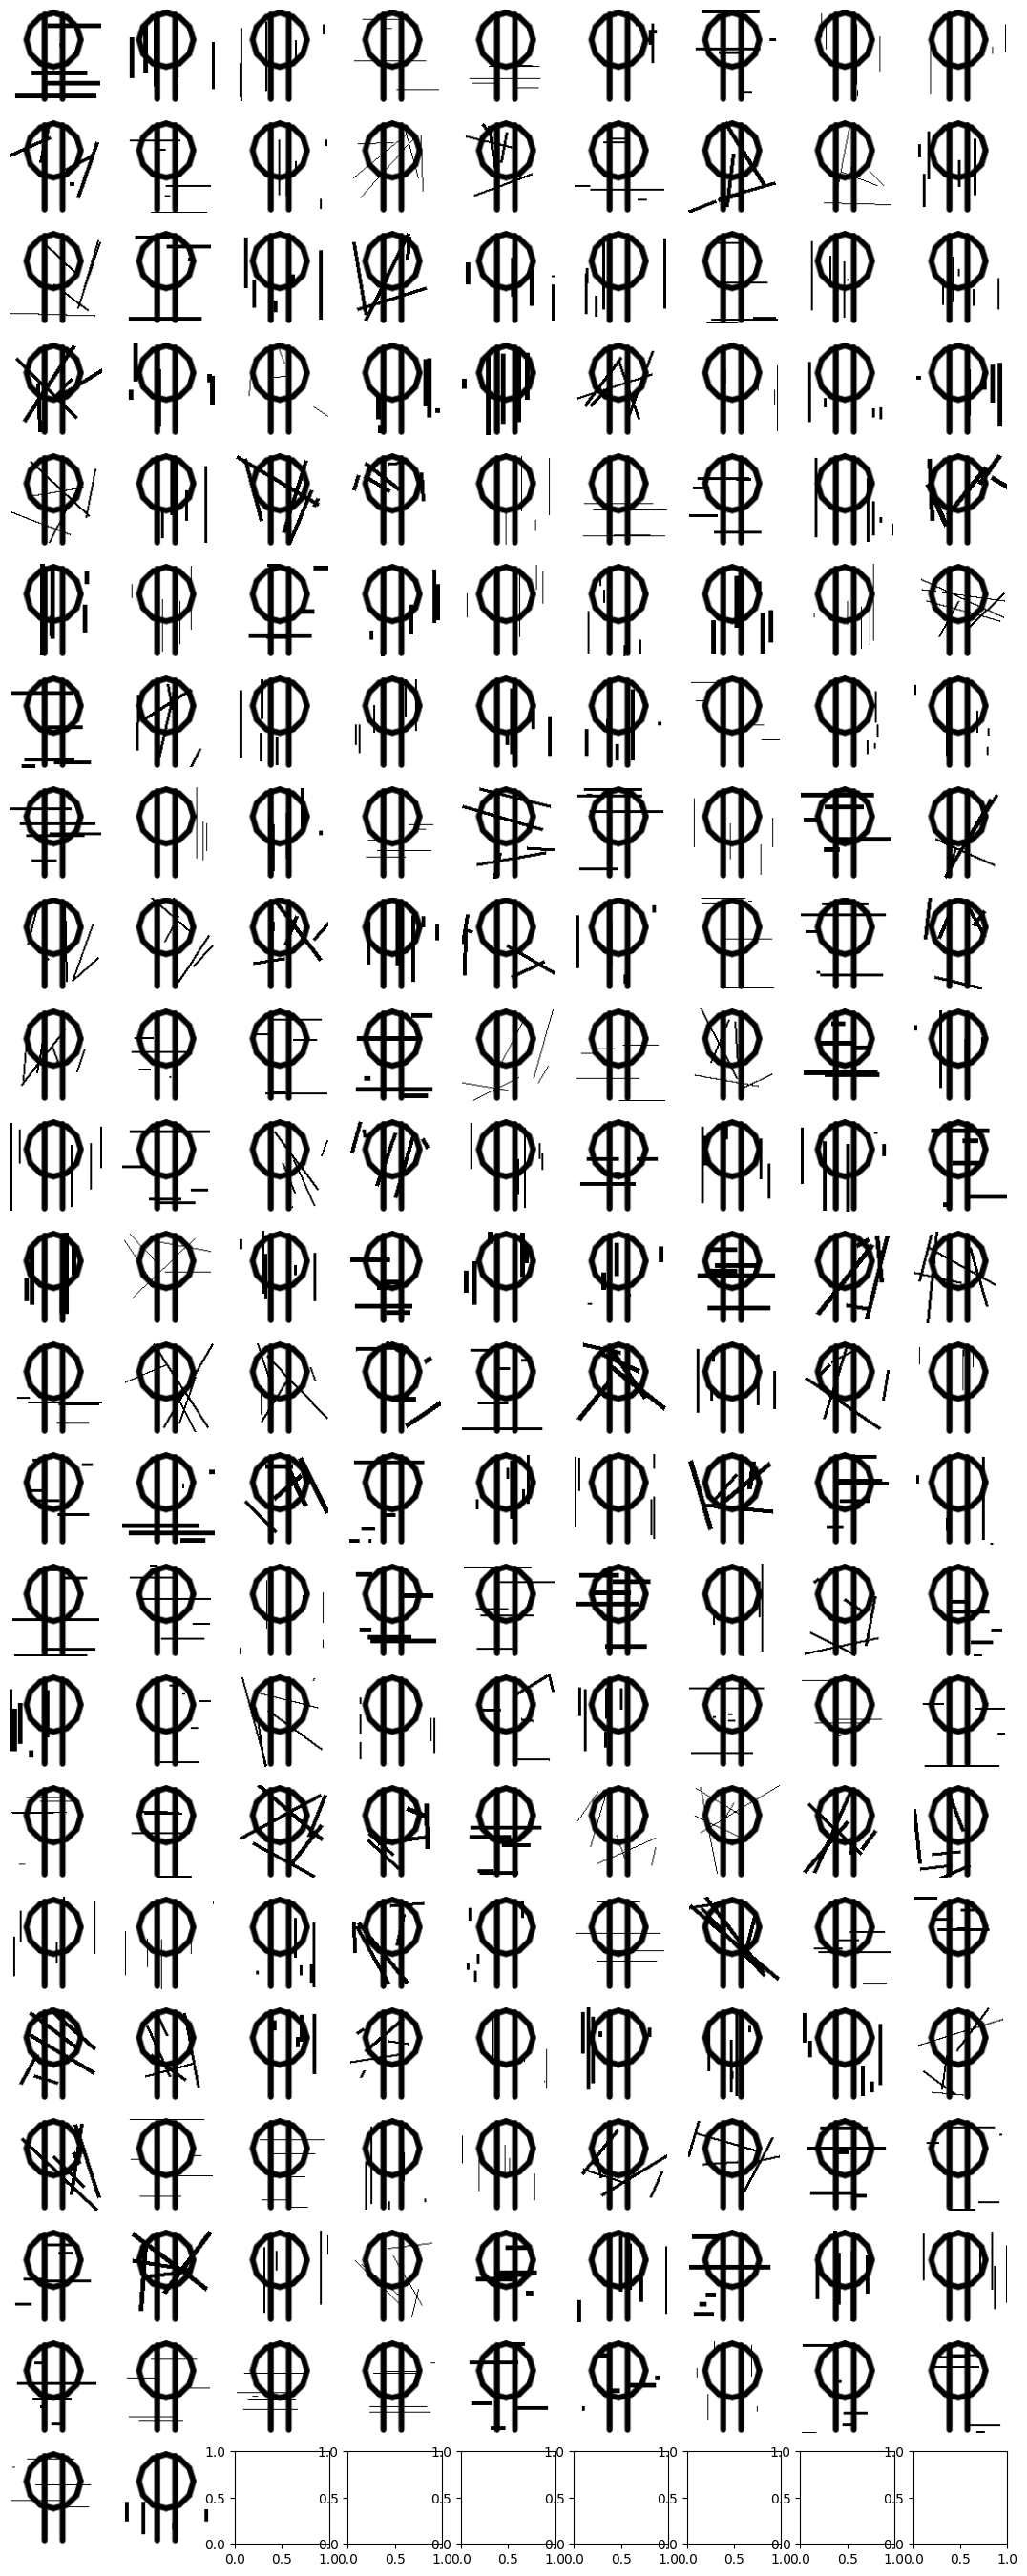

In [106]:
num_images = len(df)
num_cols = 9
num_rows = num_images // num_cols + (1 if num_images % num_cols != 0 else 0)  # Calculate the number of rows needed

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(num_cols*1.5, num_rows*1.5))

for i, ax in enumerate(axes.flat):
    if i < num_images:
        image_array = df.loc[i, 'imgarray']
        scaled_image_array = (image_array * 255).astype('uint8')
        ax.imshow(scaled_image_array, cmap='gray')
        ax.axis('off')

plt.show()